<h1 align="center">Credit Score Classification : Multiclass Target Scenario </h1>

## Overview
In this tutorial, we explore the application of the `scorescanner` library for analyzing credit scores using a dataset from [**Kaggle**](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data). Our goal is to *identify and quantify key factors influencing credit scores in a multiclass target scenario*. Starting with simple univariate indicators, we then progress to an **interpretable multivariate model**. This foundational approach prepares us to understand the basics before moving to more complex models like **gradient boosting**.

### Variable Documentation

1. **ID**: Unique identifier for each entry in the dataset.
2. **Customer_ID**: Unique identifier for each customer.
3. **Month**: Month of the year for the data entry.
4. **Name**: Name of the person.
5. **Age**: Age of the person.
6. **SSN**: Social Security Number of a person.
7. **Occupation**: Occupation of the person.
8. **Annual_Income**: Annual income of the person.
9. **Monthly_Inhand_Salary**: Monthly base salary of a person.
10. **Num_Bank_Accounts**: Number of bank accounts a person holds.
11. **Num_Credit_Card**: Number of other credit cards held by a person.
12. **Interest_Rate**: Interest rate on credit card.
13. **Num_of_Loan**: Number of loans taken from the bank.
14. **Type_of_Loan**: Types of loan taken by a person.
15. **Delay_from_due_date**: Average number of days delayed from the payment date.
16. **Num_of_Delayed_Payment**: Average number of payments delayed by a person.
17. **Changed_Credit_Limit**: Percentage change in credit card limit.
18. **Num_Credit_Inquiries**: Number of credit card inquiries.
19. **Credit_Mix**: Classification of the mix of credits.
20. **Outstanding_Debt**: Remaining debt to be paid (in USD).
21. **Credit_Utilization_Ratio**: Utilization ratio of credit card.
22. **Credit_History_Age**: Age of credit history of the person.
23. **Payment_of_Min_Amount**: Whether only the minimum amount was paid by the person.
24. **Total_EMI_per_month**: Monthly EMI payments (in USD).
25. **Amount_invested_monthly**: Monthly amount invested by the customer (in USD).
26. **Payment_Behaviour**: Payment behavior of the customer.
27. **Monthly_Balance**: Monthly balance amount of the customer (in USD).
28. **Credit_Score**: Bracket of credit score (Poor, Standard, Good). 

### Key Steps in this Tutorial:
1. **Data Preprocessing**: Applying a set of transformations to prepare our dataset.
2. **Detecting and Replacing Outliers**: Identifying and replacing outliers.
3. **Discretization of Continuous Variables**: Converting continuous variables into discrete categories for analysis (optimal binning algorithm for each continuous variable).
4. **Univariate analysis**: Univariate variable importance and visualization.
5. **Bivariate analysis**: Clustering correlation matrix (Feature clustering) and visualisation.
6. **Logistic Regression**: Handling Multicollinearity with Variable Selection Prior to Logistic Regression Modeling.



## Table of Contents
1. [Importing Libraries](#1)
2. [Reading Data](#2)
3. [Data Preprocessing](#3)
4. [Univariate analysis](#4)
5. [Bivariate analysis](#5)
6. [Modeling](#6)

### 1.Importing Libraries

In [2]:
# Standard libraries
import json
import os
import sys
from pathlib import Path

# Adding path for module importing
sys.path.append(str(Path.cwd().parent))

# Visualisation
import matplotlib.pyplot as plt


# Data manipulation
import pandas as pd
import numpy as np

# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Modelisation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ScoreScanner specific imports for data preprocessing, feature selection, univariate and bivariate analysis
import scorescanner.data
from scorescanner.feature_selection import variableselector
from scorescanner.preprocessing import (
    logisticregressionpreparer,
    multioptbinning,
    outlierdetector,
)
from scorescanner.utils.plotting import (
    bins_stats,
    generate_bar_plot,
    plot_corr_matrix,
    plot_js,
    plot_woe,
)
from scorescanner.utils.statistical_metrics import (
    calculate_cramers_v_matrix,
    calculate_js_distances,
    cluster_corr_matrix,
    logistic_regression_summary,
    one_vs_rest_woe,
    univariate_category_importance,
    univariate_feature_importance,
)

# Preprocessing credit score data
from tutorials.utils import preprocess_credit_score_data

import warnings
warnings.filterwarnings("ignore")

### 2.Reading Data

In [3]:
data = pd.read_csv(os.path.join(os.path.dirname(scorescanner.data.__file__), 'credit_score_train.csv'),low_memory=False) 

In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### 3.Data Preprocessing

#### 3.1 Data Cleaning

Now, we'll use the `preprocess_credit_score_data` function for the following data preprocessing steps:

1. Removing columns that are unlikely to have predictive power ('ID', 'Customer_ID', 'Name', 'SSN').
2. Cleaning specific columns by removing non-numeric characters and converting them to float type.
3. Processing the 'Type_of_Loan' column by creating binary features for each loan type.
4. Extracting the number of years from 'Credit_History_Age' and converting it to a float.

In [5]:
preprocessed_data = preprocess_credit_score_data(data) 

In [6]:
preprocessed_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_History_in_Year
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,Good,1,1,0,0,0,0,1,1,22.0
1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,...,Good,1,1,0,0,0,0,1,1,NaN
2,March,500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,...,Good,1,1,0,0,0,0,1,1,22.0
3,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,...,Good,1,1,0,0,0,0,1,1,22.0
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,Good,1,1,0,0,0,0,1,1,22.0


##### Parameters

In [7]:
# List of columns to process for outliers and optimal binning
columns = [col for col in preprocessed_data.columns if preprocessed_data[col].dtypes in ['float64','int64'] and col not in 'Credit_Score']
# A value used for replacing outliers and considered as an outlier in the optimal binning process
outlier_value=-999.001
# Target column
target = 'Credit_Score'

#### 3.2 Handling Outliers and Missing Values 

Now, we'll use the `OutlierDetector` class to identify outliers and replace them with extreme values (-999). Our choice is justified by our modeling strategies for linear models and tree-based models, as explained below.

#### Linear Models (Linear Regression, Logistic Regression,...)

For linear models, our approach involves the optimal binning to discretize continuous variables into bins that effectively discriminate the target variable. At each iteration, the optimal binning algorithm assesses the discriminatory power of each potential bin using statistical metrics such as Information Value (IV), Gini Impurity, or Jensen-Shannon divergence (under constraints like monotonicity or minimum bin size). For example, automatically identifying high-risk segments in credit scoring based on distinct income levels or credit utilization ratios can be a very interesting approach. Additionally, by using isolated values identified with `OutlierDetector`, we can create distinct categories for missing values and outliers. This approach ensures that such exceptional data points are handled appropriately, improving the model interpretability.

#### For Tree-Based Models (e.g., Decision Trees, Random Forests, Gradient Boosting)

Tree-based models are usually good for handling outliers, but we can still mark outliers with extreme values to help the model identify them easily among the other data points.

So, let's identify and replace outliers in our dataset:


In [8]:
# Initialization
outlier_detector = outlierdetector(
    columns=columns,
    method="IQR",
    replacement_method="constant",
    replacement_value=outlier_value,
)
# Fiting the outlierdetector to the data
outlier_detector.fit(preprocessed_data)
# Transforming data
preprocessed_data = outlier_detector.transform(df=preprocessed_data)

Replacing outliers: 100%|██████████| 25/25 [00:03<00:00,  7.14it/s]


In [9]:
preprocessed_data.head() 

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_History_in_Year
0,January,23.000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,1,1,0,0,0,0,1,1,22.0
1,February,23.000,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,-1.0,...,Good,1,1,0,0,0,0,1,1,NaN
2,March,-999.001,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,...,Good,1,1,0,0,0,0,1,1,22.0
3,April,23.000,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,...,Good,1,1,0,0,0,0,1,1,22.0
4,May,23.000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,Good,1,1,0,0,0,0,1,1,22.0


In [10]:
# upper and lower bounds for each variable
print(json.dumps(outlier_detector.bounds, indent=3))

{
   "Age": {
      "lower": -0.5,
      "upper": 67.5
   },
   "Annual_Income": {
      "lower": -60542.630000000005,
      "upper": 152791.05
   },
   "Monthly_Inhand_Salary": {
      "lower": -4872.251927083333,
      "upper": 12455.268489583334
   },
   "Num_Bank_Accounts": {
      "lower": -3.0,
      "upper": 13.0
   },
   "Num_Credit_Card": {
      "lower": -0.5,
      "upper": 11.5
   },
   "Interest_Rate": {
      "lower": -10.0,
      "upper": 38.0
   },
   "Num_of_Loan": {
      "lower": -4.0,
      "upper": 12.0
   },
   "Delay_from_due_date": {
      "lower": -17.0,
      "upper": 55.0
   },
   "Num_of_Delayed_Payment": {
      "lower": -4.5,
      "upper": 31.5
   },
   "Changed_Credit_Limit": {
      "lower": -9.004999999999999,
      "upper": 29.195
   },
   "Num_Credit_Inquiries": {
      "lower": -6.0,
      "upper": 18.0
   },
   "Outstanding_Debt": {
      "lower": -1503.7625,
      "upper": 4015.7975
   },
   "Credit_Utilization_Ratio": {
      "lower": 15.38642181

Alternatively, the identified outliers can be replaced using estimations ('median', 'mode', 'std_dev' or 'capping_flooring'), as proposed in the methods available within the `OutlierDetector` class.

#### 3.3 Optimal binning

Now, we are going to discretize each continuous variable in our dataset using an optimal binning algorithm. This will be achieved through the `multioptbinning` class that uses the [OptBinning](https://gnpalencia.org/optbinning/) library.

### Key Parameters of multioptbinning:

- **`prebinning_method`**: This parameter define the selection method for the initial bins in the algorithm's first iteration.

- **`divergence`**: This parameter defines the metric for measuring the discriminative power of each potential bin in each iteration, an essential aspect of the binning process.

- **`monotonic_trend`**: Defines the monotonicity constraint ('event rate monotonic trend') during the optimization phase, ensuring the trend consistency across the bins.

You can also use all the parameters available in [OptBinning](https://gnpalencia.org/optbinning/) by either specifying them directly or through a dictionary using the `additional_optb_params` parameter of the class.


In [11]:
# Initialization
binner = multioptbinning(
    variables=columns,
    target=target,
    target_dtype="multiclass",
    outlier_value=outlier_value,
)
# Fiting the multioptbinning to the data
binner.fit(preprocessed_data)
# Transforming data
transformed_df_binned = binner.transform(preprocessed_data)

Fitting OptimalBinning Models: 100%|██████████| 25/25 [00:07<00:00,  3.41it/s]


In [12]:
transformed_df_binned.head() 

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_History_in_Year
0,January,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)","[1684.87, 6822.59)","(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
1,February,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,Missing
2,March,Special,Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
3,April,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","[4.50, 15.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
4,May,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)","[1684.87, 6822.59)","(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","[4.50, 15.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"


# 4. Univariate Analysis

Now we are going to perform univariate analysis on our binned dataset to discern the predictive power of each feature. The first step in this process is to use the `univariate_feature_importance` function, which assesses the strength of the relationship between each variable and the target, offering a choice between Cramér's V and the Predictive Power Score (PPS) metric. Following this initial assessment, we will further explore the data by applying the `univariate_category_importance` function. This function measures the discriminative power of each category within the dataset, using the Jensen-Shannon distance as the metric for this deeper analysis.


##### Parameters

In [13]:
features = [col for col in transformed_df_binned.columns if  col not in target]

#### 4.1 Univariate feature importance 

In [14]:
univariate_importance = univariate_feature_importance(
    df=transformed_df_binned, features=features, target_var=target, method="cramerv"
)
univariate_importance

,Feature,Univariate_Importance
13,Credit_Mix,0.402177
14,Outstanding_Debt,0.372371
9,Delay_from_due_date,0.346604
7,Interest_Rate,0.338245
12,Num_Credit_Inquiries,0.324281
16,Payment_of_Min_Amount,0.313212
5,Num_Bank_Accounts,0.290879
10,Num_of_Delayed_Payment,0.290450
6,Num_Credit_Card,0.286544
29,Credit_History_in_Year,0.277279


#### 4.2 Univariate category importance 

<b> Jensen Shannon Distance

We can start by identifying the most discriminative categories of a specific variable.

In [15]:
calculate_js_distances(
    df=transformed_df_binned, feature="Credit_Mix", target_var=target
)

,Category,Jensen-Shannon Distance
0,Bad,0.272284
1,Good,0.237071
2,NAN,0.001290
3,Standard,0.165061


The larger the Jensen-Shannon distance between the probability distribution of the target and the probability distribution of the target's modalities within each bin, the more significant it is.

<b> One vs Rest Weight of Evidence

We can also use the one-vs-rest WoE, which provides additional information. A positive WoE indicates that the reference category dominates in the respective bin, meaning that the presence of this reference category in an observation increases the likelihood of the reference category. Thus, the absolute value of the WoE measures the same thing as the Jensen-Shannon.

In [16]:
one_vs_rest_woe(
    df=transformed_df_binned, feature="Credit_Mix", target_var=target, cat_ref="Good"
)[0]

The reference category: Good


,Category,WoE,IV
0,NAN,0.007296,0.000011
1,Good,1.479796,0.761251
2,Standard,-1.296639,0.394797
3,Bad,-2.645327,0.559300


<b> Information value 

The Information Value is another metric that we can use to measure the overall importance of a variable.

In [17]:
print(
    f'The information value of {"Credit_Mix"} is: ',
    one_vs_rest_woe(
        df=transformed_df_binned,
        feature="Credit_Mix",
        target_var=target,
        cat_ref="Good",
    )[1],
)

The reference category: Good
The information value of Credit_Mix is:  1.7153579189531283


Now, we can compare the relevance of the categories across our entire dataset.

In [18]:
univariate_category_importance(
    df=transformed_df_binned, categorical_vars=features, target_var=target
)[0:30]

,Category,Jensen-Shannon Distance,Variable
1,Special,0.335936,Credit_Utilization_Ratio
1,Special,0.302687,Delay_from_due_date
3,"[24.50, inf)",0.298013,Interest_Rate
3,"[1500.01, inf)",0.291417,Outstanding_Debt
4,"[7.50, inf)",0.287324,Num_Credit_Card
3,"[8.50, inf)",0.284666,Num_Bank_Accounts
0,"(-inf, 4.50)",0.276277,Delay_from_due_date
0,Bad,0.272284,Credit_Mix
3,"[30.50, inf)",0.269213,Delay_from_due_date
5,"[20.50, inf)",0.246815,Num_of_Delayed_Payment


#### 4.3 Visualisation 

We can summarize the most important measures and statistical metrics of a variable in a table as shown below.

In [19]:
df_bins_stats = bins_stats(
    df=transformed_df_binned,
    feature="Outstanding_Debt",
    target_var=target,
    cat_ref="Good",
)
df_bins_stats

The reference category: Good


,Outstanding_Debt,count,count_Good,count_Poor,count_Standard,total_percent,percent_Good,percent_Poor,percent_Standard,Jensen-Shannon Distance,WoE,IV
0,"(-inf, 1248.06)",53688,14543,5654,33491,53.688,27.087990,10.531217,62.380793,0.170508,0.537881,0.182536
2,"[1248.06, 1500.01)",14600,2813,4016,7771,14.600,19.267123,27.506849,53.226027,0.015429,0.095299,0.001367
1,"[1500.01, inf)",26440,348,16824,9268,26.440,1.316188,63.630862,35.052950,0.291417,-2.789137,0.831189
3,Special,5272,124,2504,2644,5.272,2.352049,47.496206,50.151745,0.212440,-2.198038,0.122417


We can also visualize them using a bar plot.

In [20]:
fig = generate_bar_plot(
    df=transformed_df_binned,
    feature="Delay_from_due_date",
    target_var=target,
    cat_ref="Good",
)
fig.show()

The reference category: Good
The reference category: Good


In [21]:
fig = generate_bar_plot(
    df=transformed_df_binned,
    feature="Num_Bank_Accounts",
    target_var=target,
    cat_ref="Good",
)
fig.show()

The reference category: Good
The reference category: Good


The right axis represents the percentage, allowing us to visualize the evolution of each target modality across all bins.

We can also focus on the Weight of Evidence or the Jensen-Shannon metrics.

In [22]:
fig = plot_woe(
    df=transformed_df_binned, feature="Credit_Mix", target_var=target, cat_ref="Good"
)
fig.show()

The reference category: Good
The reference category: Good


In [23]:
fig = plot_js(
    df=transformed_df_binned,feature="Credit_Mix",target_var= target
    )
fig.show()

# 5. Bivariate Analysis

The objective of our bivariate analysis is to assess the relationships between different features using Cramér's V correlation matrix, visualize these relationships, and group variables based on their correlations through hierarchical clustering on Cramér's V correlation matrix.

#### 5.1 Cramer'v correlation matrix 

In [24]:
corr_matrix = calculate_cramers_v_matrix(df=transformed_df_binned, sampling=False)

In [25]:
plot_corr_matrix(corr_matrix)

#### 5.2 hierarchical clustering of correlation matrix

Now, We will perform feature clustering by applying hierarchical clustering to the correlation matrix using Ward's method. This method minimizes the increase in total within-cluster variance at each step, leading to the formation of more equally sized and cohesive clusters. The choice of threshold in this method is crucial as it influences the final granularity of clustering, dictating how closely the features are grouped together.

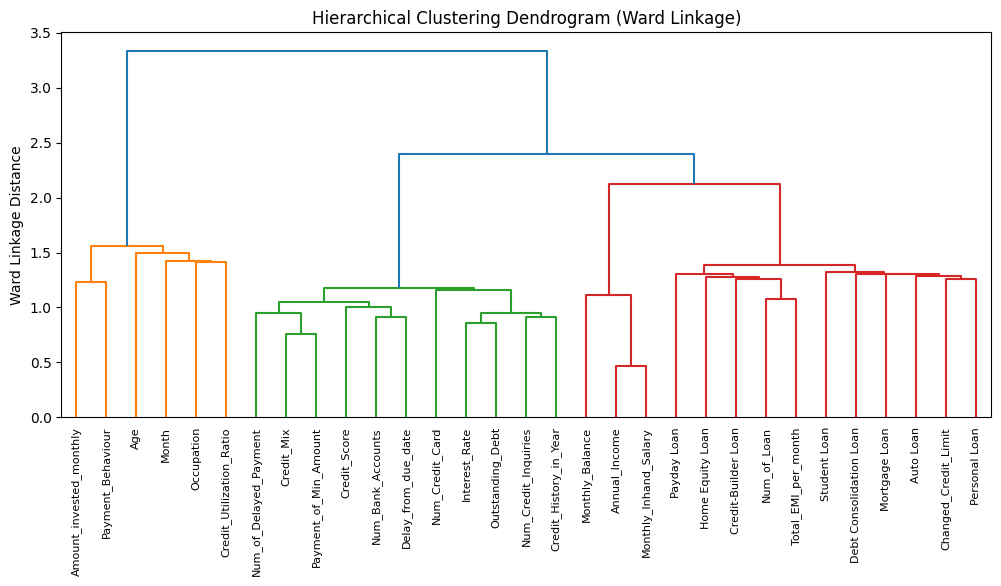

In [26]:
plt.figure(figsize=(12, 5))
dissimilarity = 1 - abs(corr_matrix)
Z = linkage(dissimilarity, 'ward') 
dendrogram(Z, labels=corr_matrix.columns, orientation='top', leaf_rotation=90)
plt.ylabel('Ward Linkage Distance')
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.show()

Based on the dendrogram, we can choose an appropriate clustering distance threshold.

In [27]:
corr_matrix_clustered = cluster_corr_matrix(corr_matrix=corr_matrix, threshold=1.7) 
plot_corr_matrix(corr_matrix_clustered)

# 6. Modeling

#### 6.1 Data Preparation 

Now, we are going to use the `logisticregressionpreparer` class to prepare our data for training a logistic regression model. This class will enable us to perform the following data preparation steps:
- Perform One Hot Encoding for our categorical variables.
- Remove one variable for each categorical variable to reduce multicollinearity.
- Additionally, if we wish, we can define for each variable which category to remove, which will indirectly set our reference category. Otherwise, a category will be chosen randomly.


In [28]:
# Dictionary for reference categories
column_dict = {
    "Credit_Mix": "Bad",
    "Delay_from_due_date": "[30.50, inf)",
    "Num_Credit_Inquiries": "[8.50, inf)",
    "Num_Credit_Card": "[7.50, inf)",
    "Num_of_Delayed_Payment": "[20.50, inf)",
    "Annual_Income": "(-inf, 10270.89)",
    "Credit_Utilization_Ratio": "[24.50, inf)",
    "Interest_Rate": "(-inf, 15.50)",
    "Num_Bank_Accounts": "[8.50, inf)",
    "Outstanding_Debt": "[1500.01, inf)",
}
# Initializing the DataPreparerForLogisticRegression
data_preparer = logisticregressionpreparer(
    columns=[col for col in features], column_dict=column_dict
)
# Applying the data preparation steps
prepared_df = data_preparer.fit_transform(transformed_df_binned)

In [29]:
prepared_df.head() 

,Credit_Score,Month_April (vs January),Month_August (vs January),Month_February (vs January),Month_July (vs January),Month_June (vs January),Month_March (vs January),Month_May (vs January),"Age_Special (vs (-inf, 49.50))","Age_[49.50, inf) (vs (-inf, 49.50))",...,Personal Loan_0 (vs 1),Debt Consolidation Loan_1 (vs 0),Student Loan_1 (vs 0),Payday Loan_1 (vs 0),Mortgage Loan_1 (vs 0),Auto Loan_0 (vs 1),Home Equity Loan_0 (vs 1),"Credit_History_in_Year_(-inf, 13.50) (vs [19.50, inf))","Credit_History_in_Year_Missing (vs [19.50, inf))","Credit_History_in_Year_[13.50, 19.50) (vs [19.50, inf))"
0,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Good,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6.2 variable selection 

Given our focus on model robustness, a significant concern before training a logistic regression is the phenomenon of correlation and multicollinearity. These issues can substantially impact the interpretability of our model:

- Coefficients may seem insignificant, even when a significant relationship exists between the predictor and the response.
- Coefficients of strongly correlated predictors can vary considerably from one sample to another.
- When terms in a model are strongly correlated, removing one of these terms will significantly impact the estimated coefficients of the others. Coefficients of strongly correlated terms might even have the incorrect sign.


To address these concerns, we propose the following approach with the `select_uncorrelated_features` function:

- The function assesses each variable's correlation with the target, helping to identify the most relevant predictors.
- It then evaluates correlations among predictors, eliminating those that are strongly correlated with others (above a defined threshold).
- This process reduces multicollinearity, ensuring that remaining variables provide unique and valuable information for the model.


Another viable strategy to enhance model robustness, particularly against multicollinearity, involves prioritizing the most discriminative predictors while also rigorously assessing multicollinearity using the Variance Inflation Factor (VIF). This method can be summarized as follows:

- Initially, the model focuses on selecting predictors that have the highest discriminatory power with respect to the target variable.
- Subsequently, for the selected predictors, the VIF is calculated for each one. The VIF quantifies the extent of multicollinearity in regression analysis. It provides a measure of how much the variance of an estimated regression coefficient increases if your predictors are correlated.
- A common threshold from the literature is employed to decide which variables to retain. Typically, a VIF value exceeding 5 or 10 (depending on the specific criteria adopted) is indicative of substantial multicollinearity, warranting the removal of the corresponding predictor from the model.
- By employing this VIF-based approach, we ensure that the predictors included in the model are not only relevant but also minimally interdependent, thereby preserving the interpretability and stability of the model coefficients.

We can now explore the results of each method:

<b>Cramer's V method on binned DataFrame

Since Cramer's V supports categorical variables, we can apply variable selection using the Cramer's V metric to both datasets `prepared_df` and `transformed_df_binned`.

In [30]:
# Initializing variableselector class
selector = variableselector(
    target="Credit_Score", corr_threshold=0.4, metric="cramers_v", use_vif=False
)

# Fitting variableselector to data
selector.fit(transformed_df_binned)

# Selected variables
print("Selected Variables:", selector.selected_variables)

# Filtering data to selected variables
selected_features_df = selector.transform(transformed_df_binned)


selected_features_df.head()



Selected Variables: ['Credit_Mix', 'Interest_Rate', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Credit_History_in_Year', 'Num_of_Loan', 'Annual_Income', 'Changed_Credit_Limit', 'Monthly_Balance', 'Auto Loan', 'Personal Loan', 'Payday Loan', 'Mortgage Loan', 'Credit-Builder Loan', 'Student Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Age', 'Payment_Behaviour', 'Amount_invested_monthly', 'Month', 'Occupation', 'Credit_Utilization_Ratio']


,Credit_Mix,Interest_Rate,Num_Credit_Inquiries,Num_Bank_Accounts,Num_Credit_Card,Credit_History_in_Year,Num_of_Loan,Annual_Income,Changed_Credit_Limit,Monthly_Balance,...,Credit-Builder Loan,Student Loan,Debt Consolidation Loan,Home Equity Loan,Age,Payment_Behaviour,Amount_invested_monthly,Month,Occupation,Credit_Utilization_Ratio
0,NAN,"(-inf, 15.50)","(-inf, 4.50)","(-inf, 5.50)","[3.50, 4.50)","[19.50, inf)","[1.50, 4.50)","[10270.89, 20994.00)","[10.32, 11.97)","[270.76, 326.15)",...,1,0,0,1,"(-inf, 49.50)",High_spent_Small_value_payments,"(-inf, 383.81)",January,Scientist,"[24.50, inf)"
1,Good,"(-inf, 15.50)","(-inf, 4.50)","(-inf, 5.50)","[3.50, 4.50)",Missing,"[1.50, 4.50)","[10270.89, 20994.00)","[10.32, 11.97)","[270.76, 326.15)",...,1,0,0,1,"(-inf, 49.50)",Low_spent_Large_value_payments,"(-inf, 383.81)",February,Scientist,"[24.50, inf)"
2,Good,"(-inf, 15.50)","(-inf, 4.50)","(-inf, 5.50)","[3.50, 4.50)","[19.50, inf)","[1.50, 4.50)","[10270.89, 20994.00)",Missing,"[326.15, 564.57)",...,1,0,0,1,Special,Low_spent_Medium_value_payments,"(-inf, 383.81)",March,Scientist,"[24.50, inf)"
3,Good,"(-inf, 15.50)","(-inf, 4.50)","(-inf, 5.50)","[3.50, 4.50)","[19.50, inf)","[1.50, 4.50)","[10270.89, 20994.00)","(-inf, 10.32)","(-inf, 270.76)",...,1,0,0,1,"(-inf, 49.50)",Low_spent_Small_value_payments,"(-inf, 383.81)",April,Scientist,"[24.50, inf)"
4,Good,"(-inf, 15.50)","(-inf, 4.50)","(-inf, 5.50)","[3.50, 4.50)","[19.50, inf)","[1.50, 4.50)","[10270.89, 20994.00)","[10.32, 11.97)","[326.15, 564.57)",...,1,0,0,1,"(-inf, 49.50)",High_spent_Medium_value_payments,"(-inf, 383.81)",May,Scientist,"[24.50, inf)"


Now we can open the JSON file to understand the flow of the algorithm. It contains key-value pairs where the key is the selected variable, and the value is a list of variables removed due to their strong correlation with the key variable.

In [31]:
with open("eliminated_variables_info.json", 'r') as file:
    data = json.load(file)
print(json.dumps(data, indent=3))

{
   "Credit_Mix": [
      "Outstanding_Debt",
      "Delay_from_due_date",
      "Payment_of_Min_Amount",
      "Num_of_Delayed_Payment"
   ],
   "Interest_Rate": [],
   "Num_Credit_Inquiries": [],
   "Num_Bank_Accounts": [],
   "Num_Credit_Card": [],
   "Credit_History_in_Year": [],
   "Num_of_Loan": [
      "Total_EMI_per_month"
   ],
   "Annual_Income": [
      "Monthly_Inhand_Salary"
   ],
   "Changed_Credit_Limit": [],
   "Monthly_Balance": [],
   "Auto Loan": [],
   "Personal Loan": [],
   "Payday Loan": [],
   "Mortgage Loan": [],
   "Credit-Builder Loan": [],
   "Student Loan": [],
   "Debt Consolidation Loan": [],
   "Home Equity Loan": [],
   "Age": [],
   "Payment_Behaviour": [],
   "Amount_invested_monthly": [],
   "Month": [],
   "Occupation": [],
   "Credit_Utilization_Ratio": []
}


For example, we can see that the variable 'Monthly_Inhand_Salary' has been removed due to its strong correlation with the variable: 'Monthly_Inhand_Salary'.

<b> OVR target ransformation 

In order for the other two methods to make sense, we will apply a one vs rest transformation to our target.

In [32]:
prepared_df['ovr_target'] = prepared_df['Credit_Score'].apply(lambda x: 1 if x == 'Good' else 0)

<b>Cramer's V method on One hot encoded DataFrame

In [33]:
# Initializing variableselector class
selector_cramer = variableselector(
    target="ovr_target", corr_threshold=0.35, metric="cramers_v", use_vif=False
)

# Fitting variableselector to data
selector_cramer.fit(prepared_df.drop(columns=["Credit_Score"]))

# Selected variables
print("Selected Variables:", selector_cramer.selected_variables)

# Filtering data to selected variables
selected_features_df = selector_cramer.transform(
    prepared_df.drop(columns=["Credit_Score"])
)


selected_features_df.head()

Selected Variables: ['Credit_Mix_Good (vs Bad)', 'Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))', 'Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))', 'Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))', 'Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))', 'Interest_Rate_[15.50, 24.50) (vs (-inf, 15.50))', 'Changed_Credit_Limit_(-inf, 10.32) (vs [10.32, 11.97))', 'Num_of_Delayed_Payment_[14.50, 20.50) (vs [20.50, inf))', 'Num_of_Loan_(-inf, 1.50) (vs [1.50, 4.50))', 'Num_Credit_Inquiries_[5.50, 8.50) (vs [8.50, inf))', 'Age_[49.50, inf) (vs (-inf, 49.50))', 'Annual_Income_[113015.18, inf) (vs (-inf, 10270.89))', 'Monthly_Balance_(-inf, 270.76) (vs [270.76, 326.15))', 'Personal Loan_0 (vs 1)', 'Auto Loan_0 (vs 1)', 'Debt Consolidation Loan_1 (vs 0)', 'Payday Loan_1 (vs 0)', 'Credit-Builder Loan_0 (vs 1)', 'Home Equity Loan_0 (vs 1)', 'Annual_Income_[10270.89, 20994.00) (vs (-inf, 10270.89))', 'Mortgage Loan_1 (vs 0)', 'Outstanding_Debt_Special (vs [1500.01, inf))', 'Student Loan_1

,Credit_Mix_Good (vs Bad),"Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))","Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))","Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))","Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))","Interest_Rate_[15.50, 24.50) (vs (-inf, 15.50))","Changed_Credit_Limit_(-inf, 10.32) (vs [10.32, 11.97))","Num_of_Delayed_Payment_[14.50, 20.50) (vs [20.50, inf))","Num_of_Loan_(-inf, 1.50) (vs [1.50, 4.50))","Num_Credit_Inquiries_[5.50, 8.50) (vs [8.50, inf))",...,"Amount_invested_monthly_Missing (vs (-inf, 383.81))",Occupation_Entrepreneur (vs Scientist),"Num_Bank_Accounts_Special (vs [8.50, inf))","Credit_Utilization_Ratio_Special (vs [24.50, inf))",Occupation_Lawyer (vs Scientist),Payment_Behaviour_Low_spent_Medium_value_payments (vs High_spent_Small_value_payments),Payment_Behaviour_Low_spent_Large_value_payments (vs High_spent_Small_value_payments),Payment_Behaviour_!@9#%8 (vs High_spent_Small_value_payments),"Num_of_Delayed_Payment_Special (vs [20.50, inf))","Changed_Credit_Limit_Missing (vs [10.32, 11.97))"
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
with open("eliminated_variables_info.json", 'r') as file:
    data = json.load(file)
print(json.dumps(data, indent=3))

{
   "Credit_Mix_Good (vs Bad)": [
      "Payment_of_Min_Amount_Yes (vs No)",
      "Num_Bank_Accounts_(-inf, 5.50) (vs [8.50, inf))",
      "Num_of_Delayed_Payment_(-inf, 7.50) (vs [20.50, inf))",
      "Num_Credit_Inquiries_(-inf, 4.50) (vs [8.50, inf))",
      "Num_of_Loan_[4.50, inf) (vs [1.50, 4.50))",
      "Credit_Mix_Standard (vs Bad)",
      "Num_Bank_Accounts_[5.50, 8.50) (vs [8.50, inf))",
      "Changed_Credit_Limit_[11.97, inf) (vs [10.32, 11.97))"
   ],
   "Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))": [
      "Credit_History_in_Year_(-inf, 13.50) (vs [19.50, inf))",
      "Interest_Rate_[24.50, inf) (vs (-inf, 15.50))",
      "Outstanding_Debt_[1248.06, 1500.01) (vs [1500.01, inf))"
   ],
   "Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))": [],
   "Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))": [
      "Num_Credit_Card_[4.50, 7.50) (vs [7.50, inf))"
   ],
   "Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))": [
      "Delay_from_due_date_[15.50, 30.50) (

<b>Pearson correlation method

In [35]:
# Initializing variableselector class
selector_pearson = variableselector(
    target="ovr_target", corr_threshold=0.3, metric="pearson", use_vif=False
)

# Fitting variableselector to data
selector_pearson.fit(prepared_df.drop(columns=["Credit_Score"]))

# Selected variables
print("Selected Variables:", selector_pearson.selected_variables)

# Filtering data to selected variables
selected_features_df = selector_pearson.transform(prepared_df.drop(columns=["Credit_Score"]))


selected_features_df.head()


Selected Variables: ['Credit_Mix_Good (vs Bad)', 'Payment_of_Min_Amount_Yes (vs No)', 'Credit_Mix_Standard (vs Bad)', 'Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))', 'Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))', 'Delay_from_due_date_[15.50, 30.50) (vs [30.50, inf))', 'Num_of_Delayed_Payment_[14.50, 20.50) (vs [20.50, inf))', 'Num_of_Loan_(-inf, 1.50) (vs [1.50, 4.50))', 'Num_Credit_Inquiries_[5.50, 8.50) (vs [8.50, inf))', 'Age_[49.50, inf) (vs (-inf, 49.50))', 'Annual_Income_[113015.18, inf) (vs (-inf, 10270.89))', 'Monthly_Balance_(-inf, 270.76) (vs [270.76, 326.15))', 'Personal Loan_0 (vs 1)', 'Auto Loan_0 (vs 1)', 'Debt Consolidation Loan_1 (vs 0)', 'Payday Loan_1 (vs 0)', 'Credit-Builder Loan_0 (vs 1)', 'Num_Credit_Card_[4.50, 7.50) (vs [7.50, inf))', 'Home Equity Loan_0 (vs 1)', 'Annual_Income_[10270.89, 20994.00) (vs (-inf, 10270.89))', 'Mortgage Loan_1 (vs 0)', 'Outstanding_Debt_Special (vs [1500.01, inf))', 'Student Loan_1 (vs 0)', 'Monthly_Inhand_Salary_Special (vs 

,Credit_Mix_Good (vs Bad),Payment_of_Min_Amount_Yes (vs No),Credit_Mix_Standard (vs Bad),"Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))","Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))","Delay_from_due_date_[15.50, 30.50) (vs [30.50, inf))","Num_of_Delayed_Payment_[14.50, 20.50) (vs [20.50, inf))","Num_of_Loan_(-inf, 1.50) (vs [1.50, 4.50))","Num_Credit_Inquiries_[5.50, 8.50) (vs [8.50, inf))","Age_[49.50, inf) (vs (-inf, 49.50))",...,Occupation_Architect (vs Scientist),Occupation_Accountant (vs Scientist),Occupation_Lawyer (vs Scientist),"Num_Credit_Card_Special (vs [7.50, inf))","Num_Credit_Inquiries_Special (vs [8.50, inf))",Payment_Behaviour_Low_spent_Medium_value_payments (vs High_spent_Small_value_payments),"Num_of_Delayed_Payment_Special (vs [20.50, inf))","Credit_History_in_Year_Missing (vs [19.50, inf))",Occupation_Doctor (vs Scientist),"Num_of_Delayed_Payment_Missing (vs [20.50, inf))"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
with open("eliminated_variables_info.json", 'r') as file:
    data = json.load(file)
print(json.dumps(data, indent=3))

{
   "Credit_Mix_Good (vs Bad)": [
      "Num_Bank_Accounts_(-inf, 5.50) (vs [8.50, inf))",
      "Num_of_Delayed_Payment_(-inf, 7.50) (vs [20.50, inf))",
      "Num_Credit_Inquiries_(-inf, 4.50) (vs [8.50, inf))",
      "Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))",
      "Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))",
      "Changed_Credit_Limit_(-inf, 10.32) (vs [10.32, 11.97))"
   ],
   "Payment_of_Min_Amount_Yes (vs No)": [
      "Num_of_Loan_[4.50, inf) (vs [1.50, 4.50))",
      "Credit_History_in_Year_(-inf, 13.50) (vs [19.50, inf))",
      "Num_Bank_Accounts_[5.50, 8.50) (vs [8.50, inf))",
      "Changed_Credit_Limit_[11.97, inf) (vs [10.32, 11.97))",
      "Interest_Rate_[15.50, 24.50) (vs (-inf, 15.50))",
      "Interest_Rate_[24.50, inf) (vs (-inf, 15.50))"
   ],
   "Credit_Mix_Standard (vs Bad)": [],
   "Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))": [],
   "Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))": [],
   "Delay_from_due_date_[15.50, 30.50) (vs 

<b> VIF method

In [37]:
# Initializing variableselector class
selector_vif = variableselector(target="ovr_target", use_vif=True, vif_threshold=2)

# Fitting variableselector to data
selector_vif.fit(prepared_df.drop(columns=["Credit_Score"]))

# Selected variables
print("Selected Variables:", selector_vif.selected_variables)

# Filtering data to selected variables
selected_features_df = selector_vif.transform(prepared_df.drop(columns=["Credit_Score"]))


selected_features_df.head()

Selected Variables: ['Credit_Mix_Good (vs Bad)', 'Payment_of_Min_Amount_Yes (vs No)', 'Num_Bank_Accounts_(-inf, 5.50) (vs [8.50, inf))', 'Num_of_Delayed_Payment_(-inf, 7.50) (vs [20.50, inf))', 'Num_Credit_Inquiries_(-inf, 4.50) (vs [8.50, inf))', 'Num_of_Loan_[4.50, inf) (vs [1.50, 4.50))', 'Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))', 'Credit_History_in_Year_(-inf, 13.50) (vs [19.50, inf))', 'Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))', 'Credit_Mix_Standard (vs Bad)', 'Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))', 'Changed_Credit_Limit_[11.97, inf) (vs [10.32, 11.97))', 'Delay_from_due_date_[4.50, 15.50) (vs [30.50, inf))', 'Interest_Rate_[15.50, 24.50) (vs (-inf, 15.50))', 'Interest_Rate_[24.50, inf) (vs (-inf, 15.50))', 'Num_of_Delayed_Payment_[14.50, 20.50) (vs [20.50, inf))', 'Num_of_Loan_(-inf, 1.50) (vs [1.50, 4.50))', 'Num_Credit_Inquiries_[5.50, 8.50) (vs [8.50, inf))', 'Age_[49.50, inf) (vs (-inf, 49.50))', 'Annual_Income_[113015.18, inf) (vs (-inf, 10270

,Credit_Mix_Good (vs Bad),Payment_of_Min_Amount_Yes (vs No),"Num_Bank_Accounts_(-inf, 5.50) (vs [8.50, inf))","Num_of_Delayed_Payment_(-inf, 7.50) (vs [20.50, inf))","Num_Credit_Inquiries_(-inf, 4.50) (vs [8.50, inf))","Num_of_Loan_[4.50, inf) (vs [1.50, 4.50))","Outstanding_Debt_(-inf, 1248.06) (vs [1500.01, inf))","Credit_History_in_Year_(-inf, 13.50) (vs [19.50, inf))","Delay_from_due_date_(-inf, 4.50) (vs [30.50, inf))",Credit_Mix_Standard (vs Bad),...,"Amount_invested_monthly_Missing (vs (-inf, 383.81))",Occupation_Entrepreneur (vs Scientist),"Num_Bank_Accounts_Special (vs [8.50, inf))","Credit_Utilization_Ratio_Special (vs [24.50, inf))",Occupation_Lawyer (vs Scientist),Payment_Behaviour_Low_spent_Medium_value_payments (vs High_spent_Small_value_payments),Payment_Behaviour_Low_spent_Large_value_payments (vs High_spent_Small_value_payments),Payment_Behaviour_!@9#%8 (vs High_spent_Small_value_payments),"Num_of_Delayed_Payment_Special (vs [20.50, inf))","Changed_Credit_Limit_Missing (vs [10.32, 11.97))"
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
with open("eliminated_variables_info.json", 'r') as file:
    data = json.load(file)
print(json.dumps(data, indent=3))

{
   "Credit_Mix_Bad (vs NAN)": 2.180980244396947,
   "Changed_Credit_Limit_(-inf, 10.32) (vs [10.32, 11.97))": 2.4015283122674314,
   "Interest_Rate_[24.50, inf) (vs (-inf, 15.50))": 2.0160539317107142,
   "Delay_from_due_date_[30.50, inf) (vs (-inf, 4.50))": 2.3329507546678174,
   "Num_Credit_Card_[4.50, 7.50) (vs [3.50, 4.50))": 2.1101726035925683,
   "Monthly_Inhand_Salary_(-inf, 889.56) (vs [1684.87, 6822.59))": 2.1686661292272507,
   "Annual_Income_[83709.80, 113015.18) (vs [10270.89, 20994.00))": 2.932616523636938,
   "Monthly_Balance_[326.15, 564.57) (vs [270.76, 326.15))": 2.0480614655164513,
   "Annual_Income_[20994.00, 83709.80) (vs [10270.89, 20994.00))": 2.799111800908975
}


We can also combine two methods; for example, we can combine the Cramér's V indicator with VIF (Variance Inflation Factor).

#### 6.3 Logistic Regression model 

<b> Splitting the Training and Test Sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    prepared_df[selector_pearson.selected_variables], 
    prepared_df['ovr_target'], 
    test_size=0.1, 
    random_state=42, 
    stratify=prepared_df['ovr_target']
)

<b> Fitting the model 

In [39]:
logreg = LogisticRegression(solver = 'newton-cholesky',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='newton-cholesky')

<b> Logistic regression report 

In [40]:
logistic_regression_report  = logistic_regression_summary(model=logreg,
                            X=X_train,
                            columns=X_train.columns.tolist(),
                            y=y_train,
                            intercept=True,
                            multi_class = False,
                            ).reset_index()

logistic_regression_report

,index,variable,coef,std error,z,P>|z|,[0.025,0.975]
0,0,intercept,0.02,0.05,-78.10,0.0,0.01,0.02
1,1,Credit_Mix_Good (vs Bad),8.61,0.06,35.63,0.0,7.65,9.70
2,4,"Num_Credit_Card_(-inf, 3.50) (vs [7.50, inf))",6.32,0.08,24.48,0.0,5.46,7.33
3,73,Credit_Mix_NAN (vs Bad),4.39,0.06,26.70,0.0,3.93,4.89
4,29,"Num_Credit_Card_[3.50, 4.50) (vs [7.50, inf))",4.12,0.07,20.56,0.0,3.60,4.72
5,78,"Num_Credit_Card_Special (vs [7.50, inf))",4.00,0.03,42.50,0.0,3.75,4.26
6,2,Payment_of_Min_Amount_Yes (vs No),0.33,0.03,-40.85,0.0,0.31,0.34
7,18,"Num_Credit_Card_[4.50, 7.50) (vs [7.50, inf))",3.01,0.10,11.27,0.0,2.48,3.65
8,25,"Delay_from_due_date_Special (vs [30.50, inf))",0.35,0.10,-10.29,0.0,0.29,0.43
9,6,"Delay_from_due_date_[15.50, 30.50) (vs [30.50,...",0.53,0.02,-30.42,0.0,0.51,0.55


In [51]:
from sklearn.pipeline import Pipeline
columns = [col for col in preprocessed_data.columns if preprocessed_data[col].dtypes in ['float64', 'int64'] and col != 'Credit_Score']

# Création de la pipeline
pipeline = Pipeline(steps=[
    ('outlier_detection', outlierdetector(columns=columns, method='IQR', replacement_method='constant', replacement_value=-999.001)),
    ('optimal_binning', multioptbinning(variables=columns, target='Credit_Score', target_dtype="multiclass", outlier_value=-999.001))
])

# Application de la pipeline au DataFrame prétraité
preprocessed_data = pipeline.fit_transform(preprocessed_data)

Replacing outliers:  12%|█▎        | 1/8 [00:00<00:00,  7.12it/s]

Fitting OptimalBinning Models: 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]


# ScoreScanner

**ScoreScanner** is a Python library designed to accelerate and simplify the process of understanding and quantifying the relationship between explanatory variables and the target variable in the context of predictive Machine Learning modeling.

## Table of Contents
- [Key Features](#key-features)
- [Installation](#installation)
- [Quick Tutorial](#quick-tutorial)

## Key Features

### Preprocessing
- **Outlier Identification & Replacement**: Automatically detecting and replacing outliers.
- **Supervised Binning of Continuous Variables**: Converting continuous variables into categorical ones using supervised binning techniques for better interpretability.

### Variable Analysis
- **Univariate Feature Importance**: Identify the most impactful features on the target variable using statistical measures.
- **Divergent Category Identification**: Pinpoint the categories that deviate most from the target, providing deeper insights into data using Jensen-Shannon divergence.

### Variable Selection
- **Multicollinearity Elimination**: Reducing multicollinearity to ensure that model's predictors are independent, enhancing the stability and interpretability of your model.

### Modelisation
- **Logistic Regression Report**: Generate detailed logistic regression reports, offering a clear view of how each independent variable influences the target.

## Installation

```bash
pip install scorescanner
```
## Quick Tutorial
### Importing Librairies 
```python
# Preprocessing credit score data
import pandas as pd
from tutorials.utils import preprocess_credit_score_data
import scorescanner.data
from scorescanner.preprocessing import (
    LogisticRegressionPreparer,
    MultiOptBinning,
    OutlierDetector,
)
from scorescanner.feature_selection import VariableSelector

from sklearn.pipeline import Pipeline

# Modelisation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
```
### Reading Data
```python
data = pd.read_csv(os.path.join(os.path.dirname(scorescanner.data.__file__), 'credit_score_train.csv'),low_memory=False) 
```
We'll use a credit scoring dataset from [**Kaggle**](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data) for this tutorial.

### Preprocessing
```python
preprocessed_data = preprocess_credit_score_data(data) 
```
### Preprocessing Pipeline
```python
preprocessing_pipeline = [
    ('outlier_detection', OutlierDetector(
        columns=columns,
        method="IQR",
        replacement_method="constant",
        replacement_value=outlier_value,
    )),
    ('optimal_binning', MultiOptBinning(
        variables=columns,
        target=target,
        target_dtype="multiclass",
        outlier_value=outlier_value,
    ))
]

# Create the preprocessing pipeline
data_preprocessing_pipeline = Pipeline(steps=preprocessing_pipeline)

# Fitting the pipeline on the data
data_preprocessing_pipeline.fit(preprocessed_data)

# Transforming the data using the pipeline
transformed_df_binned = data_preprocessing_pipeline.transform(preprocessed_data)


In [12]:
### Preprocessing Pipeline
# List of columns to process for outliers and optimal binning
columns = [col for col in preprocessed_data.columns if preprocessed_data[col].dtypes in ['float64','int64'] and col not in 'Credit_Score']
# A value used for replacing outliers and considered as an outlier in the optimal binning process
outlier_value=-999.001
# Target column
target = 'Credit_Score'
preprocessing_pipeline = [
    ('outlier_detection', outlierdetector(
        columns=columns,
        method="IQR",
        replacement_method="constant",
        replacement_value=outlier_value,
    )),
    ('optimal_binning', multioptbinning(
        variables=columns,
        target=target,
        target_dtype="multiclass",
        outlier_value=outlier_value,
    ))
]

# Create the preprocessing pipeline
data_preprocessing_pipeline = Pipeline(steps=preprocessing_pipeline)

# Transforming the data using the pipeline
transformed_df_binned = data_preprocessing_pipeline.fit_transform(preprocessed_data)


Replacing outliers:   4%|▍         | 1/25 [00:00<00:02,  8.59it/s]

Fitting OptimalBinning Models: 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]


In [9]:
from sklearn.pipeline import Pipeline

In [11]:
transformed_df_binned

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_History_in_Year
0,January,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)","[1684.87, 6822.59)","(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
1,February,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,Missing
2,March,Special,Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","(-inf, 4.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
3,April,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)",Missing,"(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","[4.50, 15.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
4,May,"(-inf, 49.50)",Scientist,"[10270.89, 20994.00)","[1684.87, 6822.59)","(-inf, 5.50)","[3.50, 4.50)","(-inf, 15.50)","[1.50, 4.50)","[4.50, 15.50)",...,Good,1,1,0,0,0,0,1,1,"[19.50, inf)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,"(-inf, 49.50)",Mechanic,"[20994.00, 83709.80)","[1684.87, 6822.59)","(-inf, 5.50)","[4.50, 7.50)","(-inf, 15.50)","[1.50, 4.50)","[15.50, 30.50)",...,Poor,0,0,0,1,0,0,1,0,"[19.50, inf)"
99996,May,"(-inf, 49.50)",Mechanic,"[20994.00, 83709.80)","[1684.87, 6822.59)","(-inf, 5.50)","[4.50, 7.50)","(-inf, 15.50)","[1.50, 4.50)","[15.50, 30.50)",...,Poor,0,0,0,1,0,0,1,0,"[19.50, inf)"
99997,June,"(-inf, 49.50)",Mechanic,"[20994.00, 83709.80)","[1684.87, 6822.59)","(-inf, 5.50)","[4.50, 7.50)",Special,"[1.50, 4.50)","[15.50, 30.50)",...,Poor,0,0,0,1,0,0,1,0,"[19.50, inf)"
99998,July,"(-inf, 49.50)",Mechanic,"[20994.00, 83709.80)","[1684.87, 6822.59)","(-inf, 5.50)","[4.50, 7.50)","(-inf, 15.50)","[1.50, 4.50)","[15.50, 30.50)",...,Standard,0,0,0,1,0,0,1,0,"[19.50, inf)"
